# Data Wrangling

In [37]:
import pandas as pd
from datetime import datetime
# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [38]:
data = pd.read_csv('Metadata_Sentiment_Topic.csv')
data.head()

,channel_name,subscriber_count,video_id,video_title,published_datetime,duration,view_count,like_count,dislike_count,comment_count,description,thumbnail_url,class,transcript,hook,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras
0,@Mrwhosetheboss,20200000,neIYdLysqlk,I tested the Craziest Xiaomi Gadgets!,2024-11-13T12:04:54Z,PT27M53S,6679521,219704,0,8890,I'm still genuinely in shock how great some of...,https://i.ytimg.com/vi/neIYdLysqlk/hqdefault.jpg,Diamond,you probably know xiaomi for their suspiciousl...,you probably know xiaomi for their suspiciousl...,-0.1260,1.0000,0.9598,0.781448,0.000000,0.150271,0.068281,0.000000
1,@Mrwhosetheboss,20200000,YX8ks42Azn8,The TRIPLE FOLDING phone has a Problem.,2024-10-26T14:06:50Z,PT12M54S,3464013,111736,0,5932,This phone has a LOT of good....and a LOT of b...,https://i.ytimg.com/vi/YX8ks42Azn8/hqdefault.jpg,Diamond,this right here is the Huawei mate XT I spent ...,this right here is the Huawei mate XT I spent ...,-0.4019,0.9999,-0.8691,0.912694,0.000000,0.000000,0.000000,0.087306
2,@Mrwhosetheboss,20200000,4RcThoRG46c,I tested every Celebrity Tech product!,2024-10-05T10:52:18Z,PT27M15S,5872358,185517,0,5921,"Celebrity tech from Ronaldo, Mbappe, Will Smit...",https://i.ytimg.com/vi/4RcThoRG46c/hqdefault.jpg,Diamond,in front of me right now are VTech products ma...,in front of me right now are VTech products ma...,0.0000,1.0000,0.9552,0.708494,0.023958,0.064661,0.202886,0.000000
3,@Mrwhosetheboss,20200000,vSIbvJB4WdI,iPhone 16 Pro Max vs Samsung S24 Ultra Camera ...,2024-09-19T11:44:30Z,PT16M44S,3852255,116115,0,10790,iPhone 16 Pro / Pro Max camera test comparison...,https://i.ytimg.com/vi/vSIbvJB4WdI/hqdefault.jpg,Diamond,this is the iPhone 16 Pro Max this is the Sams...,this is the iPhone 16 Pro Max this is the Sams...,-0.4389,0.9999,0.7184,0.050387,0.020822,0.028909,0.020463,0.879418
4,@Mrwhosetheboss,20200000,cRPBp2tRxFY,iPhone 16 / 16 Pro Unboxing - Testing every ne...,2024-09-18T12:00:50Z,PT21M40S,4292702,125122,0,8474,"Unboxing and testing the iPhone 16 Pro Max, iP...",https://i.ytimg.com/vi/cRPBp2tRxFY/hqdefault.jpg,Diamond,this is the iPhone 16 the iPhone 16 plus the 1...,this is the iPhone 16 the iPhone 16 plus the 1...,0.0000,0.9999,0.6124,0.124643,0.013059,0.000000,0.117100,0.745198


In [39]:
#Create the target variable (popularity)
data['popularity'] = (0.5 * data['view_count'] + 0.3 * data['like_count'] + 0.2 * data['comment_count']) / data['subscriber_count']

In [40]:
#Convert duration from ISO 8601 format (PT##H##M##S) to total seconds
def iso_duration_to_seconds(duration):
    import re
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if match:
        hours, minutes, seconds = match.groups()
        return int(hours or 0) * 3600 + int(minutes or 0) * 60 + int(seconds or 0)
    return 0

data['duration_seconds'] = data['duration'].apply(iso_duration_to_seconds)

In [41]:
#Extract temporal features from `published_datetime`
data['published_datetime'] = pd.to_datetime(data['published_datetime'])
data['published_month'] = data['published_datetime'].dt.month
data['published_day'] = data['published_datetime'].dt.day
data['published_hour'] = data['published_datetime'].dt.hour

In [42]:
def iso_duration_to_decimal_minutes(duration):
    import re
    # Regular expression to match ISO 8601 duration
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if match:
        hours, minutes, seconds = match.groups()
        # Convert to decimal minutes
        total_minutes = int(hours or 0) * 60 + int(minutes or 0) + int(seconds or 0) / 60
        return total_minutes
    return 0


In [43]:
# Apply the function to the 'duration' column
data['duration_decimal_minutes'] = data['duration'].apply(iso_duration_to_decimal_minutes)

In [44]:
#Generate ratios
data['likes_per_view'] = data['like_count'] / data['view_count']
data['comments_per_view'] = data['comment_count'] / data['view_count']

In [45]:
#Drop irrelevant columns
columns_to_drop = ['video_title', 'transcript', 'hook', 'published_datetime', 'duration', 'description', 'thumbnail_url']
data = data.drop(columns=columns_to_drop)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   channel_name              45 non-null     object 
 1   subscriber_count          45 non-null     int64  
 2   video_id                  45 non-null     object 
 3   view_count                45 non-null     int64  
 4   like_count                45 non-null     int64  
 5   dislike_count             45 non-null     int64  
 6   comment_count             45 non-null     int64  
 7   class                     45 non-null     object 
 8   title_sentiment           45 non-null     float64
 9   transcript_sentiment      45 non-null     float64
 10  hook_sentiment            45 non-null     float64
 11  tt_1_genimpressions       45 non-null     float64
 12  tt_2_tvs_streaming        45 non-null     float64
 13  tt_3_wearables            45 non-null     float64
 14  tt_4_audio_a

# EDA

c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

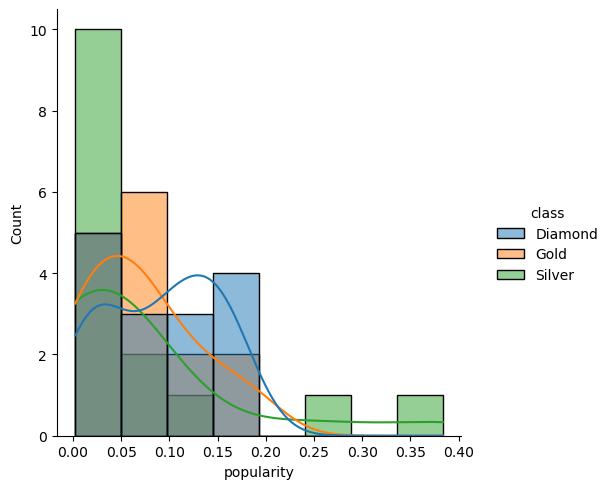

In [47]:
#Plot popularity distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data, x='popularity', kde=True, hue='class')
plt.show()

c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


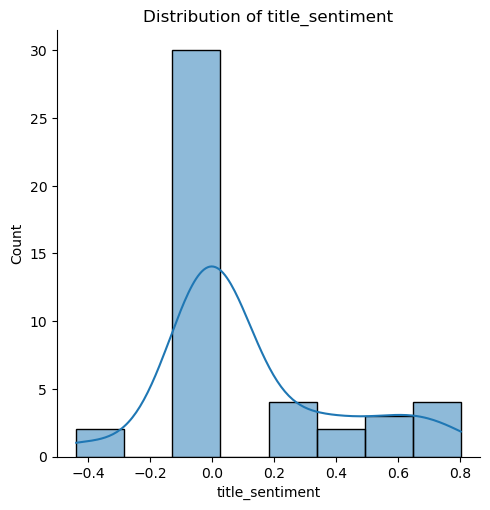

c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


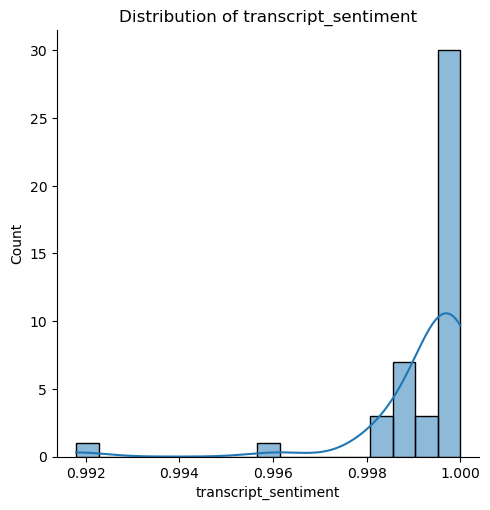

c:\Users\nosso\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


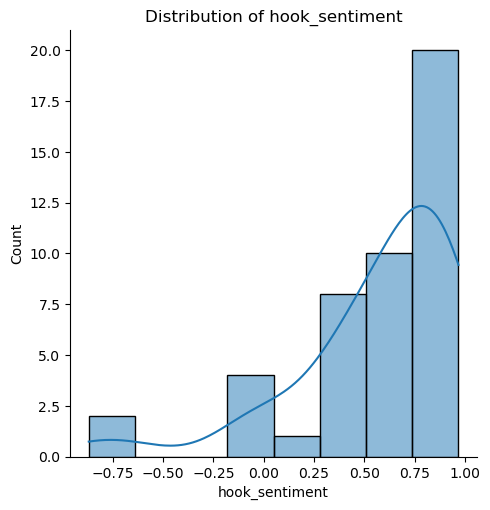

In [48]:
#Distribution of Sentiments
for sentiment_col in ['title_sentiment', 'transcript_sentiment', 'hook_sentiment']:
    sns.displot(data, x=sentiment_col, kde=True)
    plt.title(f'Distribution of {sentiment_col}')
    plt.show()


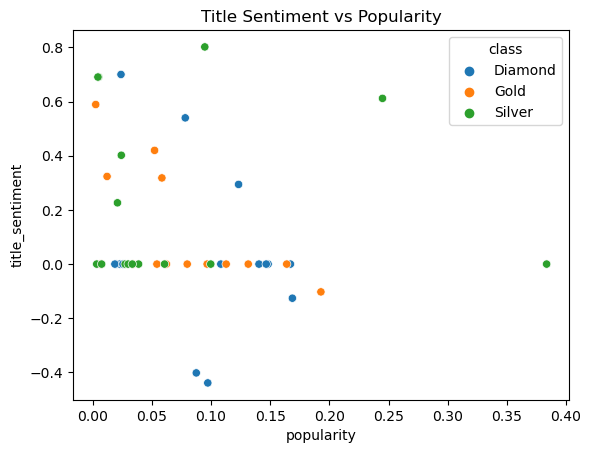

In [49]:
# Sentiment VS Popularity
sns.scatterplot(data=data, x='popularity', y='title_sentiment', hue='class')
plt.title('Title Sentiment vs Popularity')
plt.show()

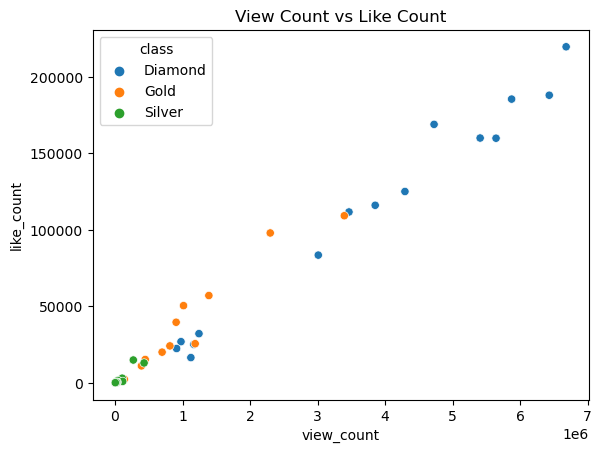

In [50]:
#View Count VS Like Count
sns.scatterplot(data=data, x='view_count', y='like_count', hue='class')
plt.title('View Count vs Like Count')
plt.show()

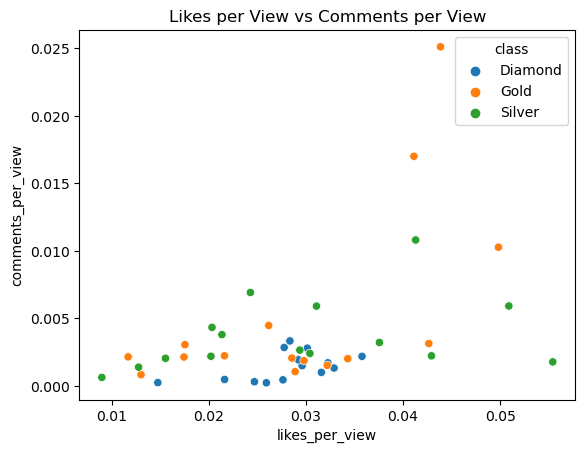

In [51]:
# Likes per view VS comments per view
sns.scatterplot(data=data, x='likes_per_view', y='comments_per_view', hue='class')
plt.title('Likes per View vs Comments per View')
plt.show()

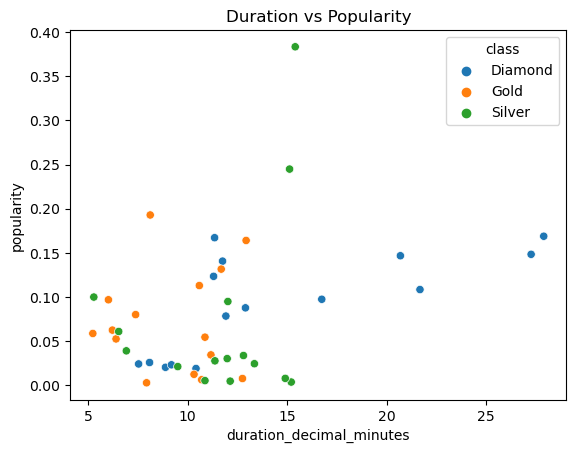

In [52]:
# Duration VS Popularity Scatter Plot
sns.scatterplot(data=data, x='duration_decimal_minutes', y='popularity', hue='class')
plt.title('Duration vs Popularity')
plt.show()

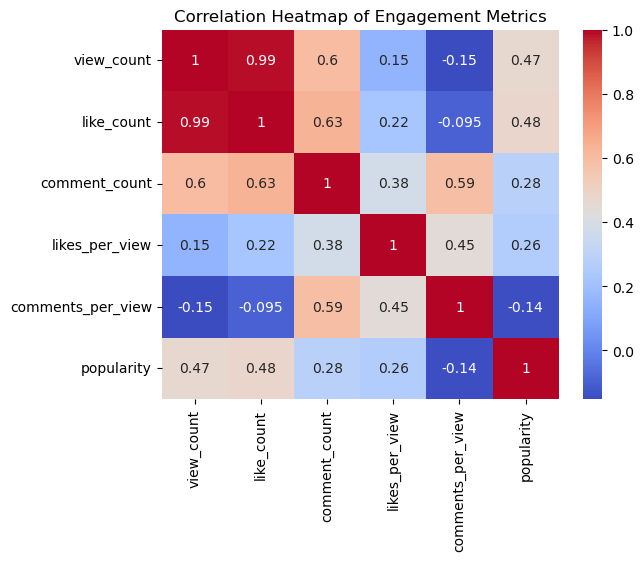

In [53]:
#Correlation map for engagement metrics
engagement_cols = ['view_count', 'like_count', 'comment_count', 'likes_per_view', 'comments_per_view', 'popularity']
sns.heatmap(data[engagement_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()


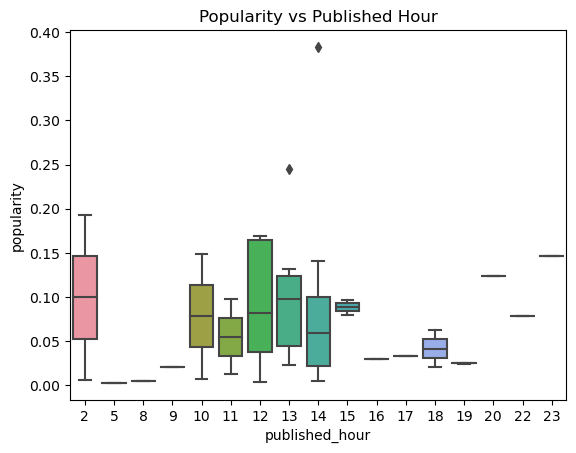

In [54]:
# Popularity VS Hour Published
sns.boxplot(data=data, x='published_hour', y='popularity')
plt.title('Popularity vs Published Hour')
plt.show()

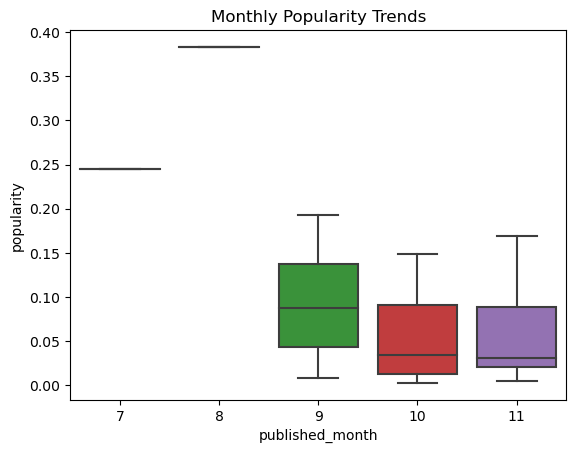

In [55]:
#Monthly popularity Trends
sns.boxplot(data=data, x='published_month', y='popularity')
plt.title('Monthly Popularity Trends')
plt.show()

# Summary Statistics

In [56]:
# Summary Statistics
data.describe()

,subscriber_count,view_count,like_count,dislike_count,comment_count,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras,popularity,duration_seconds,published_month,published_day,published_hour,duration_decimal_minutes,likes_per_view,comments_per_view
count,4.500000e+01,4.500000e+01,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,8.971889e+06,1.527212e+06,47449.955556,0.0,3982.000000,0.123109,0.999267,0.569111,0.391323,0.139285,0.117611,0.131855,0.219926,0.078210,705.600000,9.888889,16.088889,13.288889,11.760000,0.028946,0.003504
std,9.425419e+06,2.039004e+06,63898.490539,0.0,6133.012318,0.281298,0.001353,0.412058,0.381950,0.276311,0.263573,0.287862,0.337957,0.076266,298.809334,0.958745,9.265827,4.192104,4.980156,0.010613,0.004525
min,4.060000e+05,2.591000e+03,107.000000,0.0,9.000000,-0.438900,0.991800,-0.869100,0.000000,0.000000,0.000000,0.000000,0.000000,0.002449,314.000000,7.000000,1.000000,2.000000,5.233333,0.008993,0.000238
25%,5.710000e+05,3.171800e+04,579.000000,0.0,90.000000,0.000000,0.999000,0.431000,0.044540,0.000000,0.000000,0.000000,0.000000,0.022842,487.000000,9.000000,7.000000,12.000000,8.116667,0.021619,0.001503
50%,3.670000e+06,6.967910e+05,16570.000000,0.0,482.000000,0.000000,0.999800,0.718400,0.179371,0.013059,0.000000,0.001831,0.062677,0.058390,678.000000,10.000000,18.000000,13.000000,11.300000,0.029148,0.002157
75%,1.960000e+07,2.298134e+06,83551.000000,0.0,7226.000000,0.294200,0.999900,0.868000,0.784117,0.092760,0.064661,0.071393,0.206081,0.112732,774.000000,11.000000,24.000000,14.000000,12.900000,0.032892,0.003221
max,2.480000e+07,6.679521e+06,219704.000000,0.0,23622.000000,0.802000,1.000000,0.967200,1.000000,1.000000,1.000000,1.000000,1.000000,0.383592,1673.000000,11.000000,31.000000,23.000000,27.883333,0.055408,0.025106


# Normalizing Variables for Models

In [57]:
#Normalize numerical features
columns_to_normalize = [
    'subscriber_count', 'view_count', 'like_count', 'comment_count',
    'title_sentiment', 'transcript_sentiment', 'hook_sentiment',
    'duration_seconds', 'duration_decimal_minutes',
    'likes_per_view', 'comments_per_view'
]

In [58]:
# Normalize the selected numerical columns
data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()

# Drop 'dislike_count' as it has zero variance and does not contribute to the analysis
data = data.drop(columns=['dislike_count'])

In [59]:
# Create dummy variables for the 'class' column
data = pd.get_dummies(data, columns=['class'], drop_first=True)
# Drop the 'channel_name' column as it's not needed
data = data.drop(columns=['channel_name'])

In [60]:
data.head()

,subscriber_count,video_id,view_count,like_count,comment_count,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras,popularity,duration_seconds,published_month,published_day,published_hour,duration_decimal_minutes,likes_per_view,comments_per_view,class_Gold,class_Silver
0,1.191259,neIYdLysqlk,2.526875,2.695745,0.800259,-0.885569,0.542028,0.948140,0.781448,0.000000,0.150271,0.068281,0.000000,0.168686,3.237516,11,13,12,3.237516,0.371799,-0.480298,False,False
1,1.191259,YX8ks42Azn8,0.949876,1.006065,0.317951,-1.866379,0.468115,-3.490312,0.912694,0.000000,0.000000,0.000000,0.087306,0.087461,0.228909,10,26,14,0.228909,0.311877,-0.395987,False,False
2,1.191259,4RcThoRG46c,2.131014,2.160725,0.316158,-0.437646,0.542028,0.936977,0.708494,0.023958,0.064661,0.202886,0.000000,0.148169,3.110345,10,5,10,3.110345,0.249249,-0.551598,False,False
3,1.191259,vSIbvJB4WdI,1.140284,1.074596,1.110058,-1.997912,0.468115,0.362301,0.050387,0.020822,0.028909,0.020463,0.879418,0.097184,0.998630,9,19,11,0.998630,0.112672,-0.155450,False,False
4,1.191259,cRPBp2tRxFY,1.356295,1.215554,0.732430,-0.437646,0.468115,0.105055,0.124643,0.013059,0.000000,0.117100,0.745198,0.108197,1.989228,9,18,12,1.989228,0.018968,-0.338182,False,False


# Testing Models
- Linear Regression: Simple and interpretable, great as a baseline.
- Ridge Regression: Adds L2 regularization, which helps with multicollinearity and overfitting.
- Lasso Regression: Adds L1 regularization, useful for feature selection by shrinking less important coefficients to zero.
- Decision Tree Regressor: Non-linear model, captures complex relationships but can overfit.
- Random Forest Regressor: Ensemble of trees, reduces overfitting, and handles non-linear relationships well.
- XGBoost: Powerful ensemble technique that often performs well on structured data.

In [61]:
X = data.drop(columns=['video_id', 'popularity', 'view_count', 'comment_count', 'like_count', 'subscriber_count','published_month', 'published_day', 'published_hour'])  # Drop non-numerical and target columns
y = data['popularity']

In [62]:
# Convert boolean columns to integers for modeling
X = X.astype(float)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
}

In [64]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Compute MSE
    rmse = np.sqrt(mse)  # Compute RMSE
    results.append((name, mse, rmse))

In [65]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE'])
results_df

,Model,MSE,RMSE
0,Linear Regression,0.006250,0.079058
1,Ridge Regression,0.001731,0.041604
2,Lasso Regression,0.005581,0.074706
3,Decision Tree Regressor,0.008243,0.090790
4,Random Forest Regressor,0.003763,0.061343


# Feature Importances

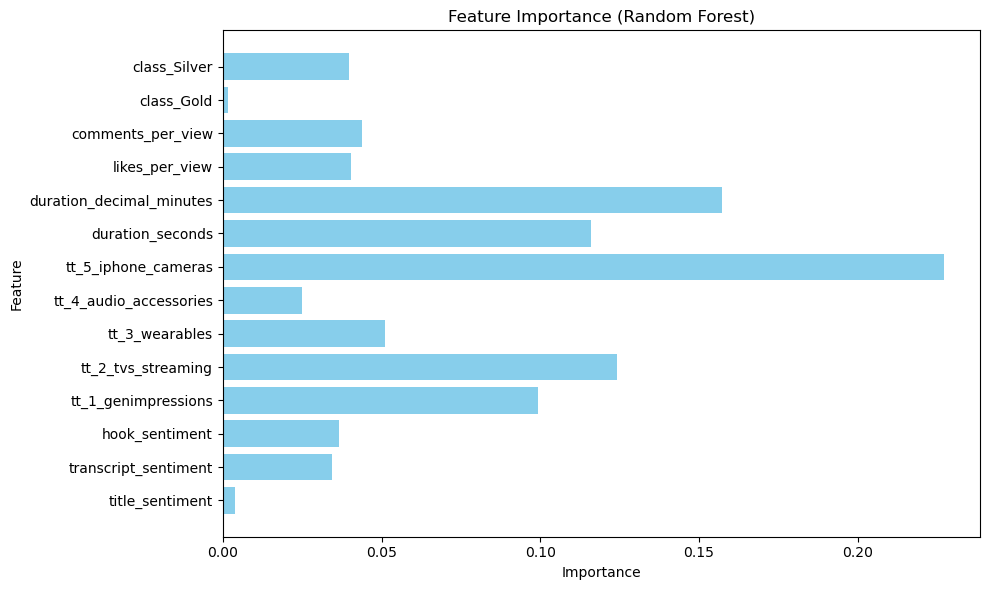

In [66]:
# Feature Importance for Random Forest
rf_model = models['Random Forest Regressor']
rf_importances = rf_model.feature_importances_

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_importances, color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

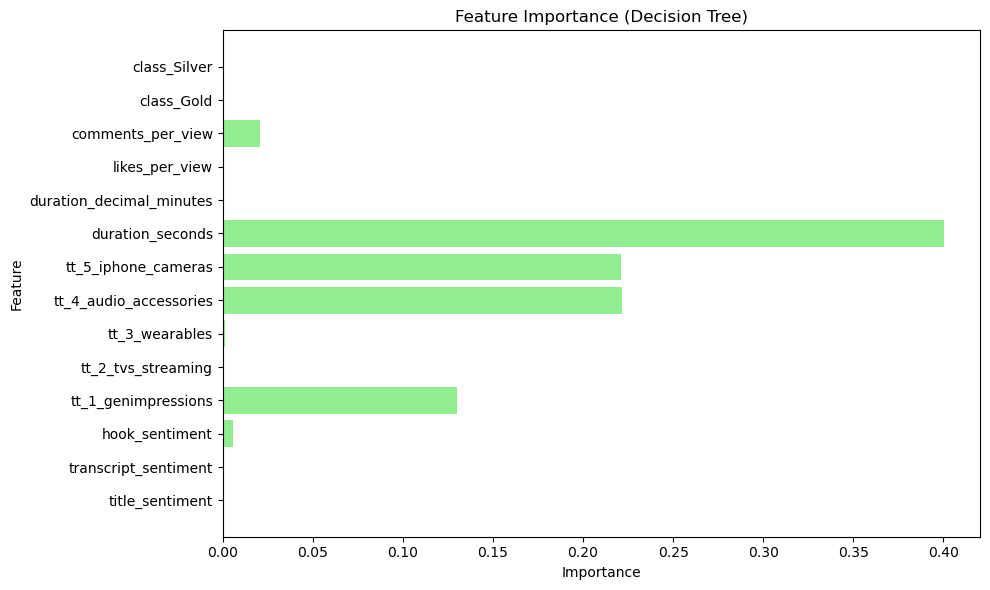

In [67]:
# Feature Importance for Decision Tree
dt_model = models['Decision Tree Regressor']
dt_importances = dt_model.feature_importances_

# Plot Decision Tree Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, dt_importances, color='lightgreen')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

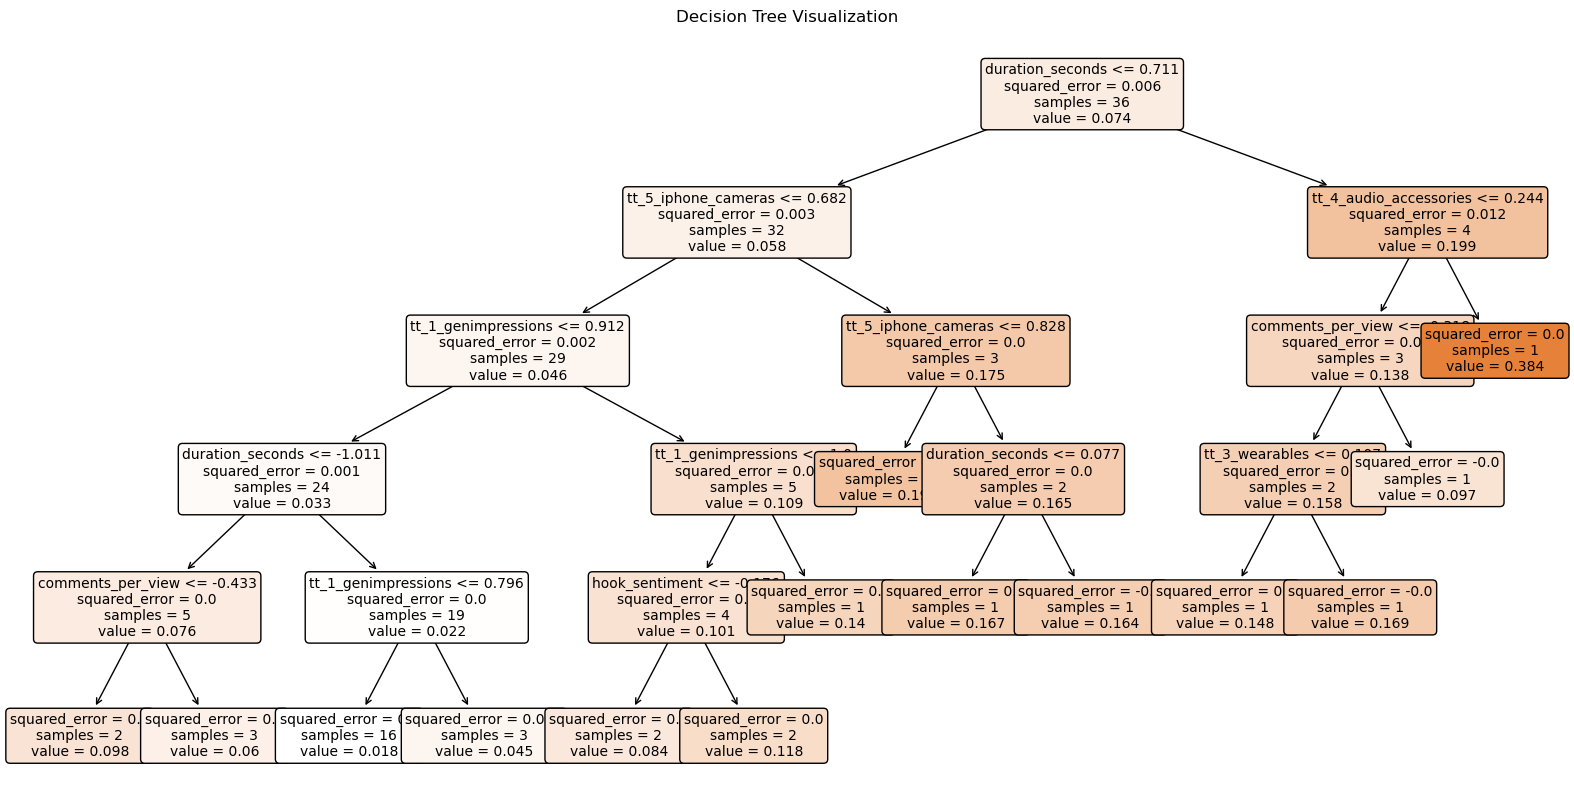

In [68]:
from sklearn.tree import plot_tree
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()

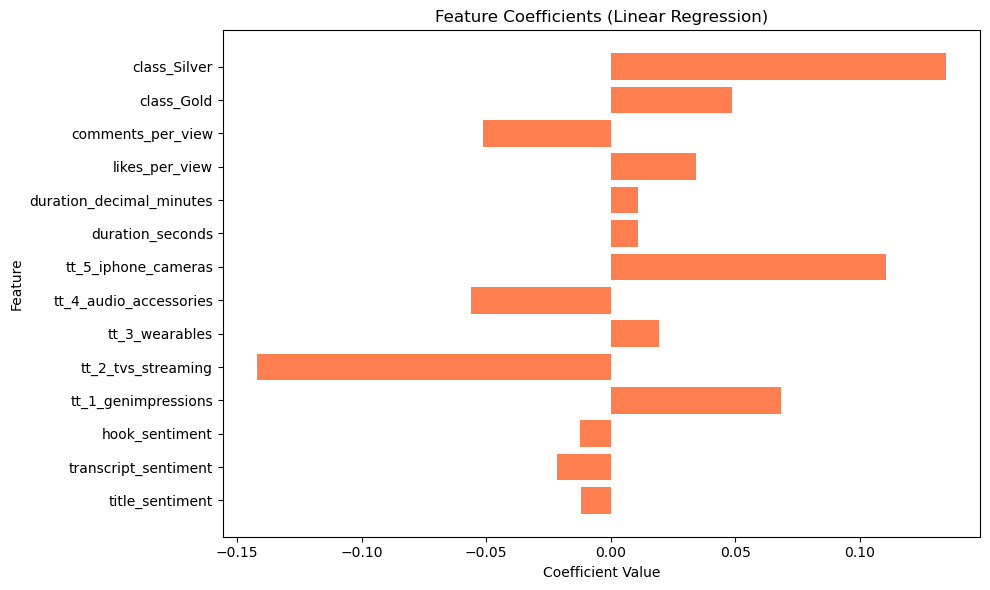

In [69]:
# Coefficients for Linear Regression
lr_model = models['Linear Regression']
lr_coefficients = lr_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, lr_coefficients, color='coral')
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

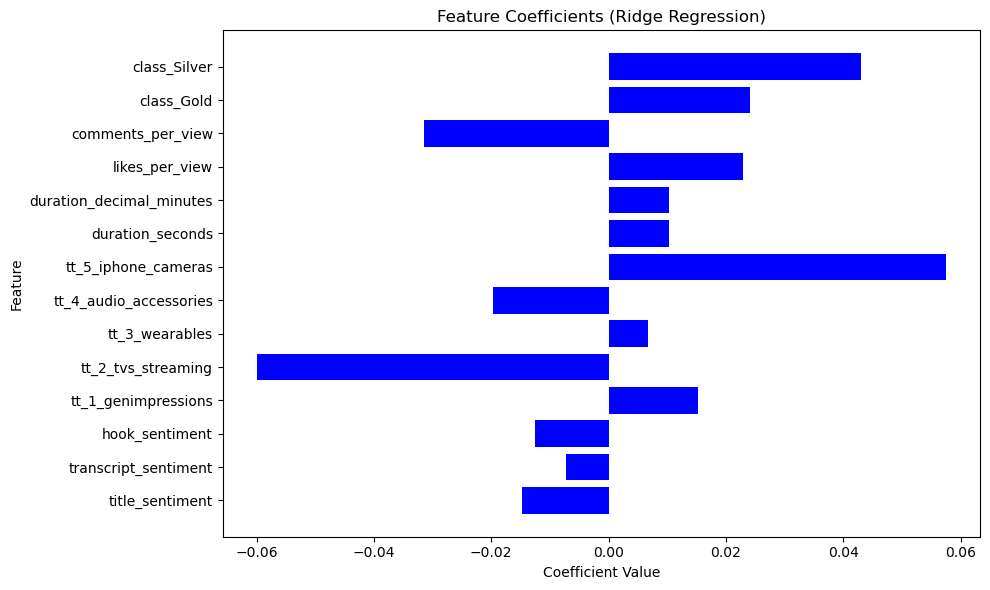

In [70]:
# Coefficients for Ridge Regression
ridge_model = models['Ridge Regression']
ridge_coefficients = ridge_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, ridge_coefficients, color='blue')
plt.title('Feature Coefficients (Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

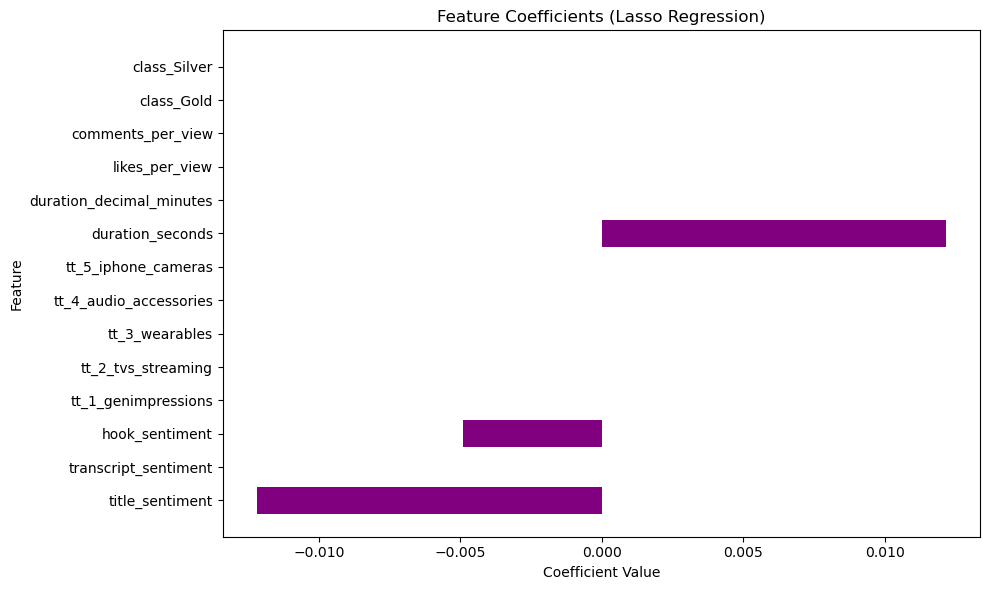

In [71]:
# Coefficients for Lasso Regression
lasso_model = models['Lasso Regression']
lasso_coefficients = lasso_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, lasso_coefficients, color='purple')
plt.title('Feature Coefficients (Lasso Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()